<a href="https://colab.research.google.com/github/soumyamargam/soumyamargam/blob/main/E_commerce_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning

## Importing the data

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [54]:
df = pd.read_csv('/content/drive/MyDrive/data.csv', encoding= 'latin1')

In [55]:
df.shape

(541909, 8)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [153]:
df.dtypes

InvoiceNo              object
StockCode               int64
Description            object
Quantity              float64
UnitPrice             float64
CustomerID              int64
Country                object
Total_Sales           float64
DateTime       datetime64[ns]
dtype: object

In [57]:
df['Total_Sales']=df['Quantity'] * df['UnitPrice']

In [58]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


# Deleting the cancelled orders which starts with "C"

In [59]:
mask = df.InvoiceNo.str.startswith('C')

In [60]:
df = df[~mask]

In [61]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [62]:
df.nunique()

InvoiceNo      22064
StockCode       4059
Description     4207
Quantity         691
InvoiceDate    19990
UnitPrice       1293
CustomerID      4339
Country           38
Total_Sales     4908
dtype: int64

In [63]:
df.describe()

,Quantity,UnitPrice,CustomerID,Total_Sales
count,532621.000000,532621.000000,397924.000000,532621.000000
mean,10.239972,3.847621,15294.315171,19.985244
std,159.593551,41.758023,1713.169877,270.574241
min,-9600.000000,-11062.060000,12346.000000,-11062.060000
25%,1.000000,1.250000,13969.000000,3.750000
50%,3.000000,2.080000,15159.000000,9.900000
75%,10.000000,4.130000,16795.000000,17.700000
max,80995.000000,13541.330000,18287.000000,168469.600000


In [64]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
Total_Sales    float64
dtype: object

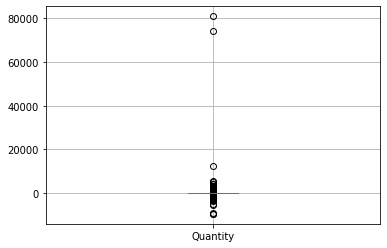

In [65]:
df["Quantity"].plot.box(grid='True')

# Removing outliers

In [66]:
#IQR
q3 = df.Quantity.quantile(0.75)
q1 = df.Quantity.quantile(0.25)
iqr = q3 - q1 

In [67]:
q3 + (1.5 * iqr)

23.5

In [68]:
q1 - (1.5 * iqr)

-12.5

In [69]:
df.Quantity = df.Quantity.clip(23.5, -12.5)

In [70]:
df.Quantity.describe()

count    532621.000000
mean          6.675895
std           7.200977
min         -12.500000
25%           1.000000
50%           3.000000
75%          10.000000
max          23.500000
Name: Quantity, dtype: float64

In [71]:
#df = df.dropna(subset=['CustomerID'], inplace = True)

In [72]:
df = df.drop_duplicates(subset = ['CustomerID'])

In [73]:
df = df[df.Quantity > 0]

In [74]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,23.5,12/1/2010 8:34,1.69,13047.0,United Kingdom,54.08
26,536370,22728,ALARM CLOCK BAKELIKE PINK,23.5,12/1/2010 8:45,3.75,12583.0,France,90.00
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,23.5,12/1/2010 9:00,2.55,13748.0,United Kingdom,204.00
65,536374,21258,VICTORIAN SEWING BOX LARGE,23.5,12/1/2010 9:09,10.95,15100.0,United Kingdom,350.40
...,...,...,...,...,...,...,...,...,...
536969,581233,22178,VICTORIAN GLASS HANGING T-LIGHT,6.0,12/8/2011 10:33,1.95,13436.0,United Kingdom,11.70
537255,581241,22922,FRIDGE MAGNETS US DINER ASSORTED,12.0,12/8/2011 10:58,0.85,15520.0,United Kingdom,10.20
538064,581385,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,23.5,12/8/2011 13:11,3.75,13298.0,United Kingdom,90.00
538812,581416,22466,FAIRY TALE COTTAGE NIGHT LIGHT,1.0,12/8/2011 14:58,1.95,14569.0,United Kingdom,1.95


In [75]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    1
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     1
Country        0
Total_Sales    0
dtype: int64

# Treating null values

In [76]:
df = df.dropna(subset = ['Description', 'CustomerID'])

In [77]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,23.5,12/1/2010 8:34,1.69,13047.0,United Kingdom,54.08
26,536370,22728,ALARM CLOCK BAKELIKE PINK,23.5,12/1/2010 8:45,3.75,12583.0,France,90.00
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,23.5,12/1/2010 9:00,2.55,13748.0,United Kingdom,204.00
65,536374,21258,VICTORIAN SEWING BOX LARGE,23.5,12/1/2010 9:09,10.95,15100.0,United Kingdom,350.40
...,...,...,...,...,...,...,...,...,...
536969,581233,22178,VICTORIAN GLASS HANGING T-LIGHT,6.0,12/8/2011 10:33,1.95,13436.0,United Kingdom,11.70
537255,581241,22922,FRIDGE MAGNETS US DINER ASSORTED,12.0,12/8/2011 10:58,0.85,15520.0,United Kingdom,10.20
538064,581385,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,23.5,12/8/2011 13:11,3.75,13298.0,United Kingdom,90.00
538812,581416,22466,FAIRY TALE COTTAGE NIGHT LIGHT,1.0,12/8/2011 14:58,1.95,14569.0,United Kingdom,1.95


In [78]:
df.describe()

,Quantity,UnitPrice,CustomerID,Total_Sales
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,9.897327,4.967133,15299.936852,57.227827
std,8.098404,34.337828,1721.889758,1181.512372
min,1.000000,0.000000,12346.000000,0.000000
25%,3.000000,1.250000,13812.500000,10.000000
50%,8.000000,2.100000,15299.000000,16.500000
75%,12.000000,4.950000,16778.500000,26.400000
max,23.500000,2033.100000,18287.000000,77183.600000


In [79]:
df.CustomerID = df.CustomerID.astype('int64')

In [81]:
df['DateTime']=pd.to_datetime(df['InvoiceDate'])

In [82]:
df = df.loc[df["DateTime"].between("2010-12-01 ", "2011-12-09")]

In [83]:
df = df.drop(columns = ['InvoiceDate'])

In [84]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Total_Sales,DateTime
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55,17850,United Kingdom,15.30,2010-12-01 08:26:00
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,23.5,1.69,13047,United Kingdom,54.08,2010-12-01 08:34:00
26,536370,22728,ALARM CLOCK BAKELIKE PINK,23.5,3.75,12583,France,90.00,2010-12-01 08:45:00
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,23.5,2.55,13748,United Kingdom,204.00,2010-12-01 09:00:00
65,536374,21258,VICTORIAN SEWING BOX LARGE,23.5,10.95,15100,United Kingdom,350.40,2010-12-01 09:09:00
...,...,...,...,...,...,...,...,...,...
534480,581149,23333,IVORY WICKER HEART MEDIUM,3.0,1.25,15471,United Kingdom,3.75,2011-12-07 14:12:00
536969,581233,22178,VICTORIAN GLASS HANGING T-LIGHT,6.0,1.95,13436,United Kingdom,11.70,2011-12-08 10:33:00
537255,581241,22922,FRIDGE MAGNETS US DINER ASSORTED,12.0,0.85,15520,United Kingdom,10.20,2011-12-08 10:58:00
538064,581385,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,23.5,3.75,13298,United Kingdom,90.00,2011-12-08 13:11:00


# NLP

# Removing punctuations

In [85]:
df['Description']=df['Description'].str.replace("[^a-zA-Z0-9]"," ")
df['Description']

0          WHITE HANGING HEART T LIGHT HOLDER
9               ASSORTED COLOUR BIRD ORNAMENT
26                  ALARM CLOCK BAKELIKE PINK
46            PAPER CHAIN KIT 50 S CHRISTMAS 
65                 VICTORIAN SEWING BOX LARGE
                         ...                 
534480              IVORY WICKER HEART MEDIUM
536969        VICTORIAN GLASS HANGING T LIGHT
537255       FRIDGE MAGNETS US DINER ASSORTED
538064    KNITTED UNION FLAG HOT WATER BOTTLE
538812         FAIRY TALE COTTAGE NIGHT LIGHT
Name: Description, Length: 4338, dtype: object

# Replacing short words

In [86]:
df['Description']=df['Description'].apply(lambda row:' '.join([word for word in row.split() if len(word)>2]))

# Lowercase character

In [87]:
df['Description'] = [row.lower() for row in df['Description']]
df['Description']

0            white hanging heart light holder
9               assorted colour bird ornament
26                  alarm clock bakelike pink
46                  paper chain kit christmas
65                 victorian sewing box large
                         ...                 
534480              ivory wicker heart medium
536969          victorian glass hanging light
537255          fridge magnets diner assorted
538064    knitted union flag hot water bottle
538812         fairy tale cottage night light
Name: Description, Length: 4338, dtype: object

# Removing Stopwords 

In [88]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [89]:
def remove_stopwords(Desc):
    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    Desc_tokenized = word_tokenize(Desc)
    Desc_new = " ".join([i for i in Desc_tokenized  if i not in stop_words])
    return Desc_new

# Removing stopwords
df['Description'] = [remove_stopwords(r) for r in df['Description']]

In [90]:
df['Description']

0            white hanging heart light holder
9               assorted colour bird ornament
26                  alarm clock bakelike pink
46                  paper chain kit christmas
65                 victorian sewing box large
                         ...                 
534480              ivory wicker heart medium
536969          victorian glass hanging light
537255          fridge magnets diner assorted
538064    knitted union flag hot water bottle
538812         fairy tale cottage night light
Name: Description, Length: 4338, dtype: object

# Lemmatization

In [91]:
# Begin Lemmatization 
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer #WNL is a class, stem is module
from nltk.corpus import wordnet

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()  #initialising class as object 'lemmatizer'

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None


# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['Description'] = df['Description'] .apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [92]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Total_Sales,DateTime
0,536365,85123A,white hang heart light holder,6.0,2.55,17850,United Kingdom,15.30,2010-12-01 08:26:00
9,536367,84879,assort colour bird ornament,23.5,1.69,13047,United Kingdom,54.08,2010-12-01 08:34:00
26,536370,22728,alarm clock bakelike pink,23.5,3.75,12583,France,90.00,2010-12-01 08:45:00
46,536371,22086,paper chain kit christmas,23.5,2.55,13748,United Kingdom,204.00,2010-12-01 09:00:00
65,536374,21258,victorian sew box large,23.5,10.95,15100,United Kingdom,350.40,2010-12-01 09:09:00
...,...,...,...,...,...,...,...,...,...
534480,581149,23333,ivory wicker heart medium,3.0,1.25,15471,United Kingdom,3.75,2011-12-07 14:12:00
536969,581233,22178,victorian glass hanging light,6.0,1.95,13436,United Kingdom,11.70,2011-12-08 10:33:00
537255,581241,22922,fridge magnet diner assorted,12.0,0.85,15520,United Kingdom,10.20,2011-12-08 10:58:00
538064,581385,84029G,knit union flag hot water bottle,23.5,3.75,13298,United Kingdom,90.00,2011-12-08 13:11:00


# Visualization

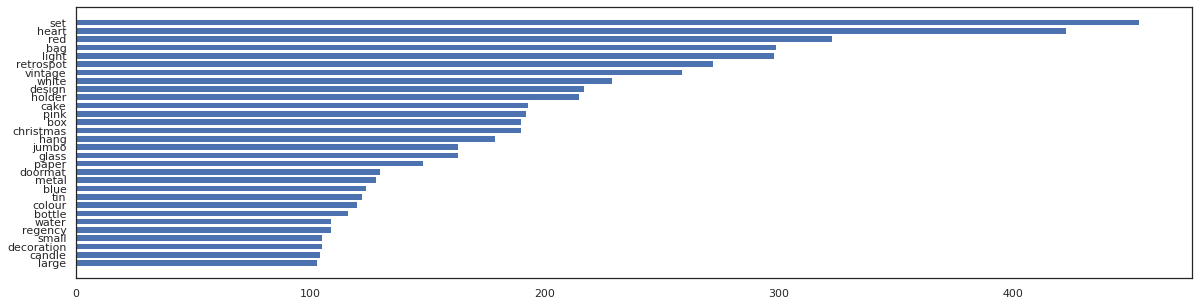

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data


#Extracts words into list and count frequency
all_words = ' '.join([text for text in df['Description']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

# Building a Word Cloud

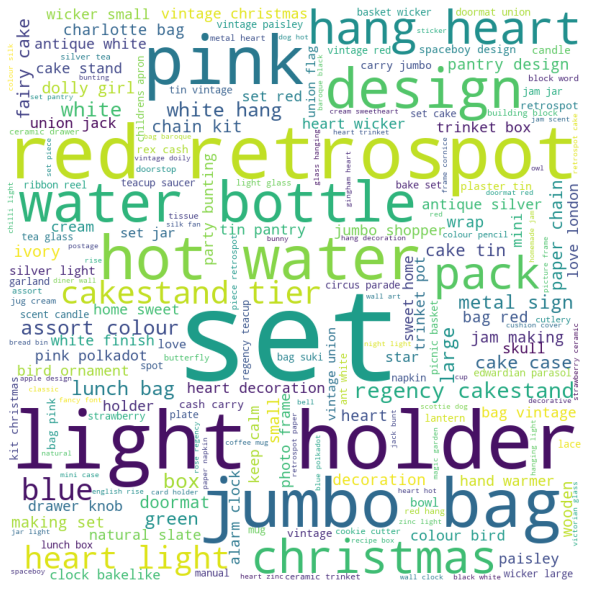

In [95]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in df['Description']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [96]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Total_Sales,DateTime
0,536365,85123A,white hang heart light holder,6.0,2.55,17850,United Kingdom,15.30,2010-12-01 08:26:00
9,536367,84879,assort colour bird ornament,23.5,1.69,13047,United Kingdom,54.08,2010-12-01 08:34:00
26,536370,22728,alarm clock bakelike pink,23.5,3.75,12583,France,90.00,2010-12-01 08:45:00
46,536371,22086,paper chain kit christmas,23.5,2.55,13748,United Kingdom,204.00,2010-12-01 09:00:00
65,536374,21258,victorian sew box large,23.5,10.95,15100,United Kingdom,350.40,2010-12-01 09:09:00
...,...,...,...,...,...,...,...,...,...
534480,581149,23333,ivory wicker heart medium,3.0,1.25,15471,United Kingdom,3.75,2011-12-07 14:12:00
536969,581233,22178,victorian glass hanging light,6.0,1.95,13436,United Kingdom,11.70,2011-12-08 10:33:00
537255,581241,22922,fridge magnet diner assorted,12.0,0.85,15520,United Kingdom,10.20,2011-12-08 10:58:00
538064,581385,84029G,knit union flag hot water bottle,23.5,3.75,13298,United Kingdom,90.00,2011-12-08 13:11:00


In [97]:
df['StockCode'].unique()


array(['85123A', '84879', '22728', ..., '21373', '22757', '22466'],
      dtype=object)

In [98]:
df['StockCode'].value_counts()

22423     71
85123A    52
84879     31
47566     31
22960     26
          ..
20886      1
22979      1
84519B     1
84798A     1
22466      1
Name: StockCode, Length: 1607, dtype: int64

In [99]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Greece', 'Singapore', 'Lebanon', 'Austria',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [100]:
df['Country'].value_counts()

United Kingdom          3921
Germany                   93
France                    87
Spain                     28
Belgium                   24
Switzerland               20
Portugal                  19
Italy                     14
Finland                   12
Norway                    10
Netherlands                9
Austria                    9
Australia                  9
Channel Islands            9
Denmark                    8
Sweden                     8
Japan                      8
Cyprus                     7
Poland                     6
Greece                     4
USA                        4
Canada                     4
Unspecified                4
EIRE                       3
Israel                     3
Malta                      2
Bahrain                    2
United Arab Emirates       2
Iceland                    1
Brazil                     1
European Community         1
Saudi Arabia               1
Czech Republic             1
Lithuania                  1
Lebanon       

# Encoding

In [101]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
#df['Country']= label_encoder.fit_transform(df['Country'])
df['StockCode'] = label_encoder.fit_transform(df['StockCode'])

In [102]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Total_Sales,DateTime
0,536365,1538,white hang heart light holder,6.0,2.55,17850,United Kingdom,15.30,2010-12-01 08:26:00
9,536367,1475,assort colour bird ornament,23.5,1.69,13047,United Kingdom,54.08,2010-12-01 08:34:00
26,536370,841,alarm clock bakelike pink,23.5,3.75,12583,France,90.00,2010-12-01 08:45:00
46,536371,463,paper chain kit christmas,23.5,2.55,13748,United Kingdom,204.00,2010-12-01 09:00:00
65,536374,183,victorian sew box large,23.5,10.95,15100,United Kingdom,350.40,2010-12-01 09:09:00
...,...,...,...,...,...,...,...,...,...
534480,581149,1195,ivory wicker heart medium,3.0,1.25,15471,United Kingdom,3.75,2011-12-07 14:12:00
536969,581233,514,victorian glass hanging light,6.0,1.95,13436,United Kingdom,11.70,2011-12-08 10:33:00
537255,581241,971,fridge magnet diner assorted,12.0,0.85,15520,United Kingdom,10.20,2011-12-08 10:58:00
538064,581385,1409,knit union flag hot water bottle,23.5,3.75,13298,United Kingdom,90.00,2011-12-08 13:11:00


# TF-IDF

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
# tfidf = TfidfVectorizer(stop_words = 'english', max_features=1000) # Intialise the model 
vec = TfidfVectorizer(stop_words = 'english', max_features=1000) # Intialise the model 

# x = tfidf.fit_transform(df.Description)
x = vec.fit_transform(df.Description)

# Show the Model as a pandas DataFrame
# feature_names = tfidf.get_feature_names()

feature_names = vec.get_feature_names()
x = pd.DataFrame(x.toarray(), columns = feature_names)

In [105]:
x

,125g,15c,15cm,250g,30cmx30cm,40x40cm,45x30cm,45x45cm,500g,60cm,...,wool,woolly,word,world,wrap,wreath,write,yellow,yuletide,zinc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Word2Vec

In [106]:
import gensim
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser

In [107]:
corpus = df['Description'].map(simple_preprocess)

In [108]:
corpus

0             [white, hang, heart, light, holder]
9                [assort, colour, bird, ornament]
26                 [alarm, clock, bakelike, pink]
46                 [paper, chain, kit, christmas]
65                   [victorian, sew, box, large]
                           ...                   
534480             [ivory, wicker, heart, medium]
536969         [victorian, glass, hanging, light]
537255          [fridge, magnet, diner, assorted]
538064    [knit, union, flag, hot, water, bottle]
538812       [fairy, tale, cottage, night, light]
Name: Description, Length: 4338, dtype: object

In [109]:
model = Word2Vec(corpus, size=100, window=3, min_count=1)

In [110]:
model.wv.most_similar('white')

[('heart', 0.9994285106658936),
 ('blue', 0.999343752861023),
 ('set', 0.9993194341659546),
 ('candle', 0.9992753267288208),
 ('wood', 0.9992520213127136),
 ('box', 0.9992383718490601),
 ('egg', 0.9992374181747437),
 ('vintage', 0.9992035627365112),
 ('design', 0.9992016553878784),
 ('red', 0.999191164970398)]

In [137]:
df2 = df.drop(['Description', 'DateTime', 'Country'], axis='columns')

In [138]:
df2

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Total_Sales
0,536365,1538,6.0,2.55,17850,15.30
9,536367,1475,23.5,1.69,13047,54.08
26,536370,841,23.5,3.75,12583,90.00
46,536371,463,23.5,2.55,13748,204.00
65,536374,183,23.5,10.95,15100,350.40
...,...,...,...,...,...,...
534480,581149,1195,3.0,1.25,15471,3.75
536969,581233,514,6.0,1.95,13436,11.70
537255,581241,971,12.0,0.85,15520,10.20
538064,581385,1409,23.5,3.75,13298,90.00


# Scaling

In [139]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(df2)
X_std = pd.DataFrame(data = X_std)

# Merging bagged data with previous data

In [140]:
X_std= pd.concat([X_std,x], axis=1)

In [141]:
X_std

,0,1,2,3,4,5,125g,15c,15cm,250g,...,wool,woolly,word,world,wrap,wreath,write,yellow,yuletide,zinc
0,-1.244660,1.628680,-0.481483,-0.070306,1.481007,-0.035487,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.244506,1.492301,1.679618,-0.095352,-1.309096,-0.002665,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.244276,0.119852,1.679618,-0.035359,-1.578638,0.027737,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.244199,-0.698421,1.679618,-0.070306,-0.901880,0.124223,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.243969,-1.304550,1.679618,0.174326,-0.116491,0.248132,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,2.190396,0.886172,-0.851957,-0.108166,0.099026,-0.045263,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4334,2.196839,-0.588019,-0.481483,-0.087780,-1.083123,-0.038534,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4335,2.197453,0.401269,0.259466,-0.119815,0.127490,-0.039804,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4336,2.208498,1.349428,1.679618,-0.035359,-1.163288,0.027737,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Determining K using Elbow plot

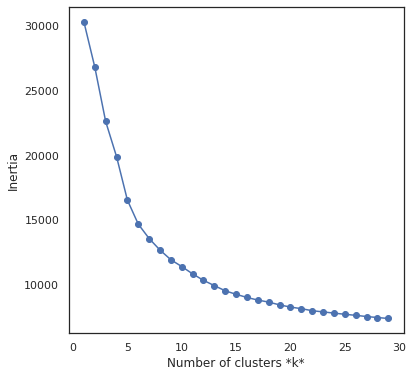

In [148]:
from sklearn.cluster import KMeans

inertias = []  # storer inertia for all values of k 
list_k = list(range(1, 30))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia'); 

# Fitting a model

In [152]:
# As the graph keep on steeping through the values. I take k value as 20

from sklearn.cluster import KMeans
km = KMeans(n_clusters=20) # applying k = 20
km.fit(X_std)

KMeans(n_clusters=20)